In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests, json, os, sys

from datetime import datetime, timedelta, timezone

from polygon import RESTClient

In [2]:
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

from polygon_api import PolygonAPI

In [3]:
client = RESTClient(api_key='rxdopHP51cQc3RtUbZrNj7Gy0CkpR2Qn')

In [4]:
from datetime import datetime, timedelta

# Function to calculate the last working day
def last_working_day():
    today = datetime.now()
    if today.weekday() == 0:
        # If today is Monday, subtract three days to get Friday
        last_working_day = today - timedelta(days=3)
    elif today.weekday() <= 4:
        last_working_day = today - timedelta(days=1)
    # If today is Saturday, subtract one day to get Friday
    elif today.weekday() == 5:
        last_working_day = today - timedelta(days=1)
    elif today.weekday() == 6:
        last_working_day = today - timedelta(days=2)
    
    return last_working_day.strftime('%Y-%m-%d')

In [5]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'IBM', 'AMZN', 'NVDA',
          'XOM', 'CVX', 'WMT', 'MMM', 'ARE', 'ALLE', 'JPM',
          'V', 'MA', 'PEP', 'CSCO', 'BA', 'ADBE', 'CAT', 
          'BLK', 'INTC', 'NKE', 'MDLZ']

In [6]:
client = PolygonAPI()

intra_day = last_working_day()

In [8]:
for ticker in tickers:

    print(f"Fetching data for: {ticker}, on {intra_day}")
    intra_day_ticker = client.fetch_aggs_with_backoff(
        ticker=ticker, 
        from_date=intra_day, 
        to_date=intra_day, 
        limit=50000,
        sleep=True
        )

    print("Structuring data into a Pandas DataFrame...")
    df = pd.DataFrame(intra_day_ticker).T

    print("Saving intraday to parquet file...")
    sink_root_path = f'C:/Users/jmtorsvik/git_repos/project-anthill/data/polygon/intraday/{ticker.lower()}/{ticker.lower()}_intraday_{intra_day.replace('-', '_')}.parquet'
    df.to_parquet(sink_root_path, index=True)
    print(f"Data for {ticker} written to {sink_root_path}\n")

    print("----------------------------\n")


Fetching data for: AAPL, on 2025-05-23
Structuring data into a Pandas DataFrame...
Saving intraday to parquet file...
Data for AAPL written to C:/Users/jmtorsvik/git_repos/project-anthill/data/polygon/intraday/aapl/aapl_intraday_2025_05_23.parquet

----------------------------

Fetching data for: MSFT, on 2025-05-23
Structuring data into a Pandas DataFrame...
Saving intraday to parquet file...
Data for MSFT written to C:/Users/jmtorsvik/git_repos/project-anthill/data/polygon/intraday/msft/msft_intraday_2025_05_23.parquet

----------------------------

Fetching data for: GOOGL, on 2025-05-23
Structuring data into a Pandas DataFrame...
Saving intraday to parquet file...
Data for GOOGL written to C:/Users/jmtorsvik/git_repos/project-anthill/data/polygon/intraday/googl/googl_intraday_2025_05_23.parquet

----------------------------

Fetching data for: IBM, on 2025-05-23


KeyboardInterrupt: 

NameError: name 'ibm' is not defined

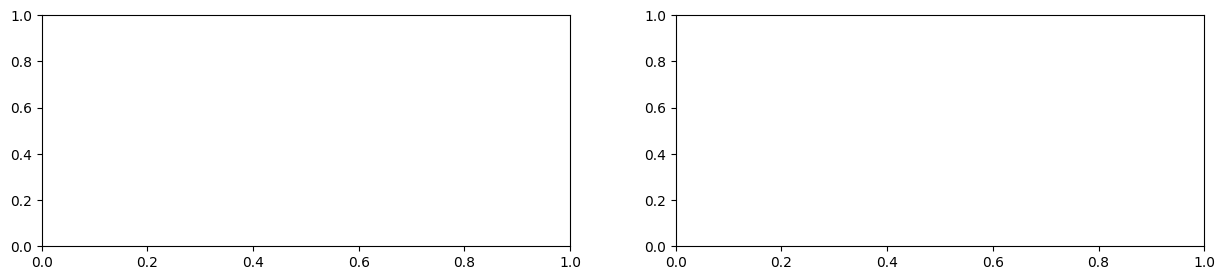

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3), sharex=True)
ibm['simple_return'].plot(ax=axes[0], title='Simple Return', color='blue')
ibm['log_return'].plot(ax=axes[1], title='Log Return', color='red')

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

print(f"Simple Return: {round(ibm['simple_return'].mean() * 100, 5)} %")
print(f"Log Return: {round(ibm['log_return'].mean() * 100, 5)} %")